In [2]:
# Step 1: Install necessary libraries
!pip install pytorch-tabnet
!pip install matplotlib

In [6]:
# Step 2: Load a sample dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
from pytorch_tabnet.tab_model import TabNetRegressor
import torch

In [7]:
np.random.seed(0)
X = np.random.rand(100, 5)
y = 3 * X[:, 0] + 2 * X[:, 1] - X[:, 2] + np.random.randn(100) * 0.1

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

# Reshape y_train and y_test to have two dimensions
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Create and train the TabNet model
tabnet = TabNetRegressor()
tabnet.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    max_epochs=100,
    patience=20,
    batch_size=64,
    virtual_batch_size=32,
    num_workers=0,
)


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 6.487   | val_0_mse: 6.38077 |  0:00:00s
epoch 1  | loss: 4.57453 | val_0_mse: 4.28804 |  0:00:00s
epoch 2  | loss: 2.13898 | val_0_mse: 2.40048 |  0:00:00s
epoch 3  | loss: 1.69695 | val_0_mse: 2.5576  |  0:00:00s
epoch 4  | loss: 0.81415 | val_0_mse: 2.42157 |  0:00:00s
epoch 5  | loss: 0.93742 | val_0_mse: 2.54157 |  0:00:00s
epoch 6  | loss: 1.00885 | val_0_mse: 2.63675 |  0:00:00s
epoch 7  | loss: 0.9849  | val_0_mse: 3.18501 |  0:00:00s
epoch 8  | loss: 0.65283 | val_0_mse: 3.89099 |  0:00:00s
epoch 9  | loss: 0.77135 | val_0_mse: 4.03959 |  0:00:00s
epoch 10 | loss: 0.45648 | val_0_mse: 3.85616 |  0:00:00s
epoch 11 | loss: 0.53458 | val_0_mse: 3.33041 |  0:00:00s
epoch 12 | loss: 0.27774 | val_0_mse: 2.84929 |  0:00:00s
epoch 13 | loss: 0.4049  | val_0_mse: 2.55869 |  0:00:00s
epoch 14 | loss: 0.24691 | val_0_mse: 2.0394  |  0:00:00s
epoch 15 | loss: 0.23218 | val_0_mse: 1.64747 |  0:00:00s
epoch 16 | loss: 0.27489 | val_0_mse: 1.44148 |  0:00:01s
epoch 17 | los

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [19]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [17]:
y_pred = tabnet.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3035831902515473
R-squared: 0.6943687993502554


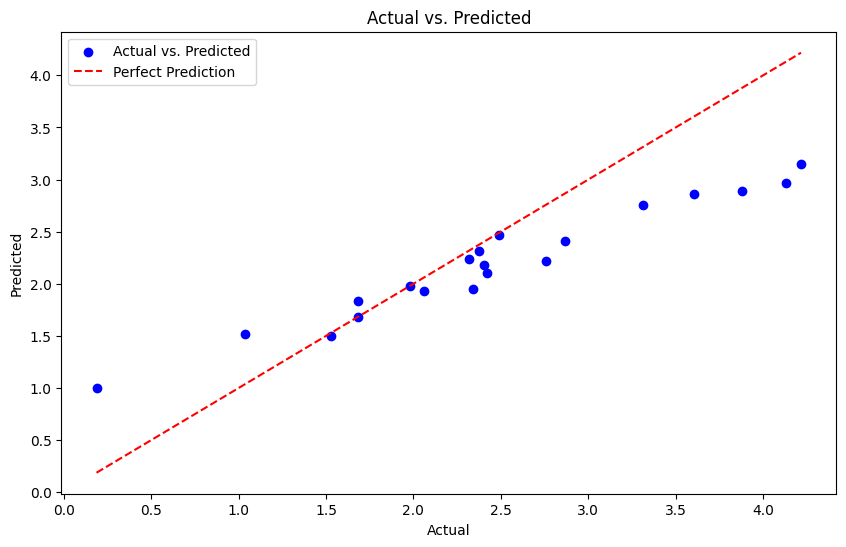

In [23]:
# Plot actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='b', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Perfect Prediction')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.legend()
plt.show()